In [2]:
!pip install --upgrade gupload
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

auth.authenticate_user()
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/final_version_with_avg_distances_and_counts.csv')
for_EDA = pd.read_csv('/content/gdrive/My Drive/FINAL_injuries_post2013.csv')
for_EDA=for_EDA.drop(['Unnamed: 0','Unnamed: 0.1','Acquired'],axis=1)

def injury_history_dur(row):
  injured_part = row['Injury Part']
  injury_history_duration = row[injured_part]
  return injury_history_duration
df['injured body part history'] = df.apply(lambda ro:injury_history_dur(ro), axis=1)
def injury_history_count(row):
  injured_part = row['Injury Part']
  injury_history_count = row[injured_part + '_count']
  return injury_history_count
df['injured body part count'] = df.apply(lambda ro:injury_history_count(ro), axis=1)
df = df[df['Acute-Chronic Workload Ratio']!= 0]

Requirement already up-to-date: gupload in /usr/local/lib/python3.7/dist-packages (1.1.0)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AxesSubplot(0.125,0.125;0.775x0.755)


-0.04203612282002375

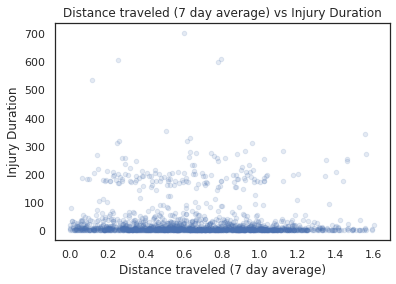

In [16]:
scatter_avg_7 = df.plot(x = '7_day_distance_avg', y = 'Injury Duration',kind='scatter', alpha=0.15)
scatter_avg_7.set_xlabel('Distance traveled (7 day average)')
scatter_avg_7.set_ylabel('Injury Duration')
scatter_avg_7.set_title('Distance traveled (7 day average) vs Injury Duration')

print(scatter_avg_7)
df['7_day_distance_avg'].corr(df['Injury Duration'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AxesSubplot(0.125,0.125;0.775x0.755)


-0.03149293424915834

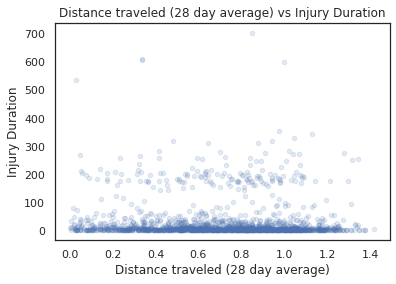

In [17]:
scatter_avg_28 = df.plot(x = '28_day_distance_avg', y = 'Injury Duration',kind='scatter', alpha=0.15)
scatter_avg_28.set_xlabel('Distance traveled (28 day average)')
scatter_avg_28.set_ylabel('Injury Duration')
scatter_avg_28.set_title('Distance traveled (28 day average) vs Injury Duration')

print(scatter_avg_7)
df['28_day_distance_avg'].corr(df['Injury Duration'])

AxesSubplot(0.125,0.125;0.775x0.755)


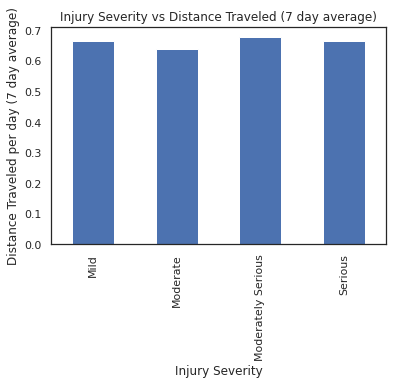

In [18]:
df_copy = df.copy()

def get_range(row):
  awcr = row['injured body part history']
  mask1 = awcr<=28
  mask2 = awcr <=90
  mask3 = awcr <= 180
  mask4 = awcr>180
  if mask1:
    return 'Mild'
  elif (not mask1) and mask2:
    return 'Moderate'
  elif (not mask2) and mask3:
    return 'Moderately Serious'
  elif mask4:
    return 'Serious'
df_copy['range'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
injdurrange_vs_7dayavg = df_copy.groupby(['range'])['7_day_distance_avg'].mean()
injdurrange_vs_7dayavg = injdurrange_vs_7dayavg.plot(kind='bar')
injdurrange_vs_7dayavg.set_xlabel('Injury Severity')
injdurrange_vs_7dayavg.set_ylabel('Distance Traveled per day (7 day average)')
injdurrange_vs_7dayavg.set_title('Injury Severity vs Distance Traveled (7 day average)')
print(injdurrange_vs_7dayavg)

AxesSubplot(0.125,0.125;0.775x0.755)


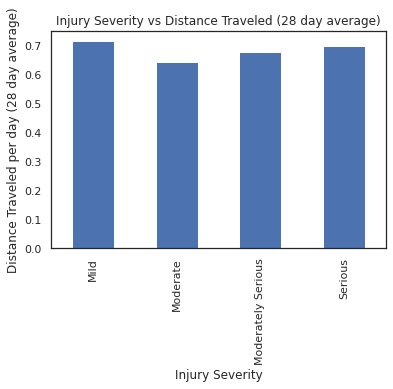

In [19]:
injdurrange_vs_28dayavg = df_copy.groupby(['range'])['28_day_distance_avg'].mean()
injdurrange_vs_28dayavg = injdurrange_vs_28dayavg.plot(kind='bar')
injdurrange_vs_28dayavg.set_xlabel('Injury Severity')
injdurrange_vs_28dayavg.set_ylabel('Distance Traveled per day (28 day average)')
injdurrange_vs_28dayavg.set_title('Injury Severity vs Distance Traveled (28 day average)')
print(injdurrange_vs_28dayavg)

(0.568, 0.852]        580
(0.852, 1.136]        498
(0.285, 0.568]        363
(-0.000705, 0.285]    198
(1.136, 1.42]         121
Name: 28_day_distance_avg, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


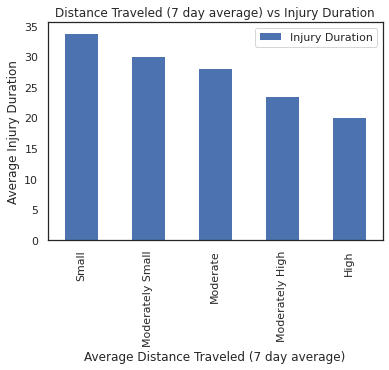

In [20]:
binned_7dayavg = pd.cut(df['28_day_distance_avg'],bins=5).value_counts()
print(binned_7dayavg)
bins = [0,0.4,0.75,1.1,1.6]

def get_range_7_day(row):
  dist = row['7_day_distance_avg']
  mask1 = dist<=0.4
  mask2 = dist <=0.75
  mask3 = dist <= 1.1
  mask4 = dist <= 1.6
  mask5 = dist > 1.6

  if mask1:
    return 'Small'
  elif (not mask1) and mask2:
    return 'Moderately Small'
  elif (not mask2) and mask3:
    return 'Moderate'
  elif mask4 and (not mask3):
    return 'Moderately High'
  elif mask5:
    return 'High'
df_copy['7 Day Range'] = df.apply(lambda ro:get_range_7_day(ro), axis=1)
injdurrange_vs_7dayavg = df_copy.groupby(['7 Day Range'])['Injury Duration'].mean()
injdurrange_vs_7dayavg = injdurrange_vs_7dayavg.to_frame()
injdurrange_vs_7dayavg = injdurrange_vs_7dayavg.reset_index()
injdurrange_vs_7dayavg_copy = injdurrange_vs_7dayavg.copy()
injdurrange_vs_7dayavg.iloc[0], injdurrange_vs_7dayavg.iloc[1],injdurrange_vs_7dayavg.iloc[2],injdurrange_vs_7dayavg.iloc[3], injdurrange_vs_7dayavg.iloc[4] = injdurrange_vs_7dayavg_copy.iloc[4], injdurrange_vs_7dayavg_copy.iloc[3],injdurrange_vs_7dayavg_copy.iloc[1],injdurrange_vs_7dayavg_copy.iloc[2], injdurrange_vs_7dayavg_copy.iloc[0]

injdurrange_vs_7dayavg = injdurrange_vs_7dayavg.plot(x = '7 Day Range',y='Injury Duration',kind='bar')
injdurrange_vs_7dayavg.set_xlabel('Average Distance Traveled (7 day average)')
injdurrange_vs_7dayavg.set_ylabel('Average Injury Duration')
injdurrange_vs_7dayavg.set_title('Distance Traveled (7 day average) vs Injury Duration')
print(injdurrange_vs_7dayavg)

       28 Day Range  Injury Duration
0             Small        35.320122
1  Moderately Small        28.150087
2          Moderate        31.085714
3   Moderately High        27.126697
4              High        20.716814
AxesSubplot(0.125,0.125;0.775x0.755)


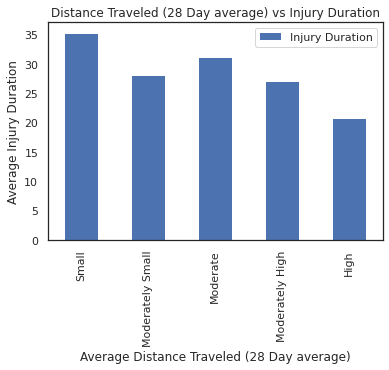

In [21]:
def get_range_28_day(row):
  dist = row['28_day_distance_avg']
  mask1 = dist<=0.4
  mask2 = dist <=0.75
  mask3 = dist <= 1.0
  mask4 = dist <= 1.15
  mask5 = dist > 1.15

  if mask1:
    return 'Small'
  elif (not mask1) and mask2:
    return 'Moderately Small'
  elif (not mask2) and mask3:
    return 'Moderate'
  elif mask4 and (not mask3):
    return 'Moderately High'
  elif mask5:
    return 'High'

df_copy['28 Day Range'] = df.apply(lambda ro:get_range_28_day(ro), axis=1)
injdurrange_vs_28dayavg = df_copy.groupby(['28 Day Range'])['Injury Duration'].mean()
injdurrange_vs_28dayavg = injdurrange_vs_28dayavg.to_frame()
injdurrange_vs_28dayavg = injdurrange_vs_28dayavg.reset_index()
injdurrange_vs_28dayavg_copy = injdurrange_vs_28dayavg.copy()
injdurrange_vs_28dayavg.iloc[0], injdurrange_vs_28dayavg.iloc[1],injdurrange_vs_28dayavg.iloc[2],injdurrange_vs_28dayavg.iloc[3], injdurrange_vs_28dayavg.iloc[4] = injdurrange_vs_28dayavg_copy.iloc[4], injdurrange_vs_28dayavg_copy.iloc[3],injdurrange_vs_28dayavg_copy.iloc[1],injdurrange_vs_28dayavg_copy.iloc[2], injdurrange_vs_28dayavg_copy.iloc[0]
print(injdurrange_vs_28dayavg)

injdurrange_vs_28dayavg = injdurrange_vs_28dayavg.plot(x = '28 Day Range',y='Injury Duration',kind='bar')
injdurrange_vs_28dayavg.set_xlabel('Average Distance Traveled (28 Day average)')
injdurrange_vs_28dayavg.set_ylabel('Average Injury Duration')
injdurrange_vs_28dayavg.set_title('Distance Traveled (28 Day average) vs Injury Duration')
print(injdurrange_vs_28dayavg)

In [22]:
szn_vs_28dayavg = df_copy.groupby(['Season'])['28_day_distance_avg'].mean()
print(szn_vs_28dayavg)


Season
2013-14    0.696908
2014-15    0.715613
2015-16    0.681812
2016-17    0.686688
2017-18    0.705257
2018-19    0.731995
Name: 28_day_distance_avg, dtype: float64


In [23]:
szn_vs_7dayavg = df_copy.groupby(['Season'])['7_day_distance_avg'].mean()
print(szn_vs_7dayavg)


Season
2013-14    0.654899
2014-15    0.640456
2015-16    0.629034
2016-17    0.662914
2017-18    0.664986
2018-19    0.688575
Name: 7_day_distance_avg, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.112
Date:                Thu, 24 Jun 2021   Prob (F-statistic):             0.0779
Time:                        11:47:01   Log-Likelihood:                -9842.4
No. Observations:                1760   AIC:                         1.969e+04
Df Residuals:                    1758   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.9746      3.339     10.475      0.000      28.426      41.523
sevendaydistanceavg    -7.8812      4.468     -1.764      0.078     -16.644       0.881
==============================================================================
Omnibus:                     1512.926   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41992.578
Skew:                           4.008   Prob(JB):                         0.00
Kurtosis:                      25.547   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

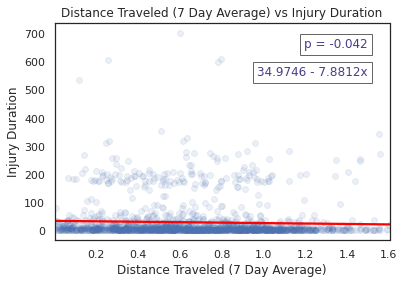

In [54]:
#### now only focusing on the counts
df_copy = df.copy()

df['InjuryDuration'] = df['Injury Duration']
df['sevendaydistanceavg'] = df['7_day_distance_avg']
df['twentyeightdaydistanceavg'] = df['28_day_distance_avg']


sns.set(style="white")
reg_plot_body = sns.regplot(x='sevendaydistanceavg',y='Injury Duration',data=df,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''Distance Traveled (7 Day Average)''', ylabel='Injury Duration',title='''Distance Traveled (7 Day Average) vs Injury Duration''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['7_day_distance_avg'],df['Injury Duration'])[0]).round(3)))
regression_func = '34.9746 - 7.8812x'
reg_plot_body.text(1.5,650,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(1.5,550,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))

model = sm.OLS.from_formula("InjuryDuration ~ sevendaydistanceavg", data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.745
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.187
Time:                        11:47:59   Log-Likelihood:                -9843.1
No. Observations:                1760   AIC:                         1.969e+04
Df Residuals:                    1758   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.4477      3.874      8.891      0.000      26.849      42.047
twentyeightdaydistanceavg    -6.6349      5.022     -1.321      0.187     -16.485       3.215
==============================================================================
Omnibus:                     1511.807   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41868.736
Skew:                           4.005   Prob(JB):                         0.00
Kurtosis:                      25.512   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

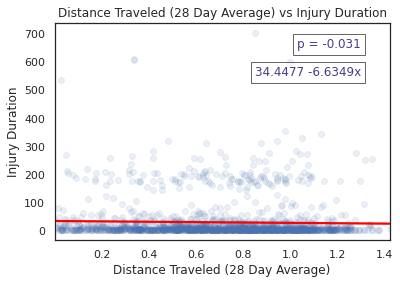

In [56]:
#### now only focusing on the counts
df_copy = df.copy()

df['InjuryDuration'] = df['Injury Duration']


sns.set(style="white")
reg_plot_body = sns.regplot(x='twentyeightdaydistanceavg',y='Injury Duration',data=df,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''Distance Traveled (28 Day Average)''', ylabel='Injury Duration',title='''Distance Traveled (28 Day Average) vs Injury Duration''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['28_day_distance_avg'],df['Injury Duration'])[0]).round(3)))
regression_func = '34.4477 -6.6349x'
df['InjuryDuration'] = df['Injury Duration']
reg_plot_body.text(1.3,650,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(1.3,550,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))

model = sm.OLS.from_formula("InjuryDuration ~ twentyeightdaydistanceavg", data=df)
result = model.fit()
result.summary()


           0
Season      
2013-14  156
2014-15  241
2015-16  216
2016-17  277
2017-18  412
2018-19  458
         tedaydistanceavg
Season                   
2013-14          0.696908
2014-15          0.715613
2015-16          0.681812
2016-17          0.686688
2017-18          0.705257
2018-19          0.731995
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NumofInj   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     2.877
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.165
Time:                        11:46:53   Log-Likelihood:                -34.940
No. Observations:                   6   AIC:                             73.88
Df Residuals:                       4   BIC:                             73.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2557.1883   1681.082     -1.521      0.203   -7224.619    2110.242
tedaydistanceavg  4054.5339   2390.434      1.696      0.165   -2582.375    1.07e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.543
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.578
Skew:                          -0.296   Prob(JB):                        0.749
Kurtosis:                       1.599   Cond. No.                         87.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

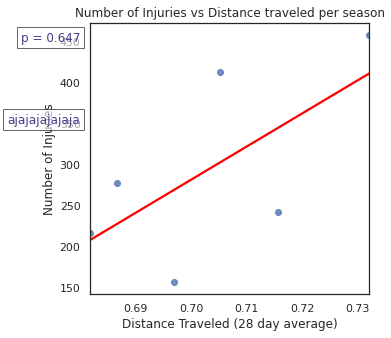

In [53]:
szn_number = df.groupby(['Season']).size()
szn_distance = df.groupby(['Season'])['tedaydistanceavg'].mean()
szn_number = szn_number.to_frame()
szn_distance = szn_distance.to_frame()
print(szn_number)
print(szn_distance)
merged_df = pd.merge(left=szn_distance, right=szn_number, left_on='Season', right_on='Season')

merged_df.columns = ['tedaydistanceavg','NumofInj']
sns.set(style="white")
reg_plot_body = sns.regplot(x='tedaydistanceavg',y='NumofInj',data=merged_df,fit_reg=True, scatter_kws={'alpha':0.8},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''Distance Traveled (28 day average)''', ylabel='Number of Injuries',title='''Number of Injuries vs Distance traveled per season''')
corr_coef = 'p = {}'.format(((stats.pearsonr(merged_df['tedaydistanceavg'],merged_df['NumofInj'])[0]).round(3)))
regression_func = 'ajajajajajaja'
reg_plot_body.text(0.68,450,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(0.68,350,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
model = sm.OLS.from_formula("NumofInj ~ tedaydistanceavg", data=merged_df)
reg_plot_body.figure.set_size_inches(5, 5)
print(reg_plot_body)
model = model.fit()
model.summary()


In [57]:
df['AWCR'] = df['Acute-Chronic Workload Ratio']
df['InjuredBodyPartCount'] = df['injured body part count']

model = sm.OLS.from_formula("InjuryDuration ~ InjuredBodyPartCount + AWCR", data=df)
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.090
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           0.000857
Time:                        14:03:57   Log-Likelihood:                -9836.9
No. Observations:                1760   AIC:                         1.968e+04
Df Residuals:                    1757   BIC:                         1.970e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               19.5299      3.391      5.759      0.000      12.879      26.181
InjuredBodyPartCount     2.6188      0.812      3.226      0.001       1.027       4.211
AWCR                     4.6472      2.436      1.908      0.057      -0.130       9.424
==============================================================================
Omnibus:                     1489.474   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39772.730
Skew:                           3.927   Prob(JB):                         0.00
Kurtosis:                      24.924   Cond. No.                         7.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Distance traveled per season (7 Day Average)')

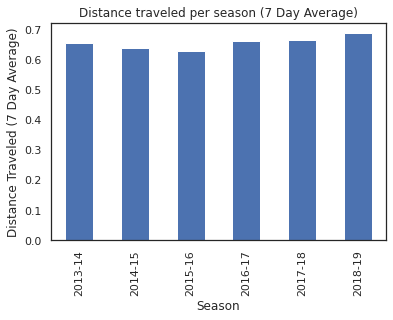

In [59]:
seven_day_avg_by_season = df.groupby(['Season'])['7_day_distance_avg'].mean()
twentyeight_day_avg_by_season = df.groupby(['Season'])['28_day_distance_avg'].mean()
seven_day_avg_by_season_plot = seven_day_avg_by_season.plot(kind='bar')
seven_day_avg_by_season_plot.set_xlabel('Season')
seven_day_avg_by_season_plot.set_ylabel('Distance Traveled (7 Day Average)')
seven_day_avg_by_season_plot.set_title('Distance traveled per season (7 Day Average)')





Text(0.5, 1.0, 'Distance traveled per season (28 Day Average)')

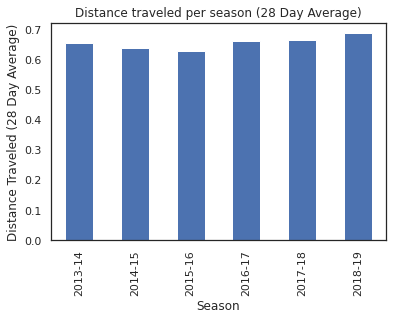

In [61]:
twentyeight_day_avg_by_season_plot = seven_day_avg_by_season.plot(kind='bar')
twentyeight_day_avg_by_season_plot.set_xlabel('Season')
twentyeight_day_avg_by_season_plot.set_ylabel('Distance Traveled (28 Day Average)')
twentyeight_day_avg_by_season_plot.set_title('Distance traveled per season (28 Day Average)')
